In [1]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import datetime
import warnings 
warnings.filterwarnings(action= 'ignore')

#modeling packages
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
from sklearn import metrics

In [2]:
# Import file
df1 = pd.read_csv('https://raw.githubusercontent.com/OscarG-DataSci/ADS-599B/main/Data%20Folder/new_elpac.csv')
df1.head()#check the head

,School_deID,GradeLevel,StudentGender,StudentEthnicity,Special_Education,Homeless,SocioEconomically,TestDayName,OverallScore,OverallLevel,ExpectedAttendanceDays,DaysAttended,EnrolledPct,GradeAttendedPct,TeacherGender,TeacherTotalYearsOfService,TeacherEthnicity,OverallScoreStd,TotalAssessments,TestInstance,Growth
0,3,1,0,4,0,1,1,6,1503,4,180.0,175.0,1.0,1.972222,0,4,3,0.740042,3,1,0
1,3,2,0,4,0,1,1,5,1549,4,180.0,175.0,1.0,2.972222,0,22,3,0.725455,3,2,0
2,3,3,0,4,0,1,1,5,1466,2,180.0,177.0,1.0,3.983333,0,25,3,0.605364,3,3,-2
3,5,4,1,4,0,0,1,0,1535,3,180.0,168.0,1.0,4.933333,0,2,5,0.662651,1,1,0
4,6,3,1,4,0,0,1,6,1412,1,180.0,179.0,1.0,3.994444,0,2,3,0.501916,3,1,0


In [3]:
df = df1.drop(columns = ['OverallScore'])

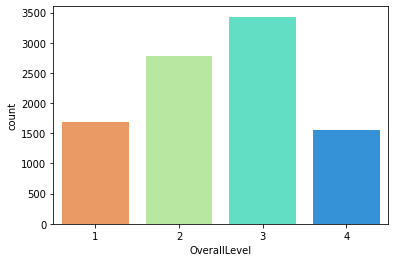

In [4]:
fig_szie=(12,8)
sns.countplot(df['OverallLevel'], data = df, palette = 'rainbow_r')

A slight class-imbalance was observed amaong the scores.

Downsampling will be performed for level 2 and 3 as reference to level 4 count.

Balanced dataset will be trained with models to see the accuracy performance.

In [5]:
#downsamples level 2 and 3 as reference to level 4

lev_0 = df[df['OverallLevel'] == 0]
lev_1 = df[df['OverallLevel'] == 1]
lev_2 = df[df['OverallLevel'] == 2]
lev_3 = df[df['OverallLevel'] == 3]
lev_4 = df[df['OverallLevel'] == 4]

In [6]:
from sklearn.utils import resample

lev1_dsample = resample(lev_1,replace=True,n_samples=len(lev_4),random_state=42)
lev2_dsample = resample(lev_2,replace=True,n_samples=len(lev_4),random_state=42)
lev3_dsample = resample(lev_3,replace=True,n_samples=len(lev_4),random_state=42)

In [7]:
#create a new dataframe with balanced datasets

frames = (lev1_dsample, lev2_dsample, lev3_dsample, lev_4)
df1 = pd.concat(frames)
df1.shape

(6244, 20)

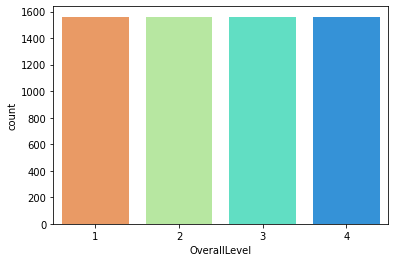

In [8]:
fig_szie=(12,8)
sns.countplot(df1['OverallLevel'], data = df1, palette = 'rainbow_r')

In [9]:
from sklearn.model_selection import train_test_split


X = df1.loc[ : , df1.columns != 'OverallLevel']
y = df1[['OverallLevel']]

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=700, test_size=0.30)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(4370, 19) (4370, 1) (1874, 19) (1874, 1)


In [10]:
X_train.head(3)

,School_deID,GradeLevel,StudentGender,StudentEthnicity,Special_Education,Homeless,SocioEconomically,TestDayName,ExpectedAttendanceDays,DaysAttended,EnrolledPct,GradeAttendedPct,TeacherGender,TeacherTotalYearsOfService,TeacherEthnicity,OverallScoreStd,TotalAssessments,TestInstance,Growth
2076,7,6,0,4,0,0,0,0,180.0,180.0,1.0,6.999999,1,21,3,0.747841,4,4,3
1003,9,3,0,4,0,0,1,5,180.0,179.0,1.0,3.994444,1,21,3,0.737548,4,4,2
2764,3,5,1,4,0,0,1,6,180.0,179.0,1.0,5.994444,0,6,7,0.681583,4,3,0


In [11]:
y_train.head()

,OverallLevel
2076,4
1003,4
2764,3
2517,3
4700,4


###**MODELLING**

In [12]:
print(X_train.shape, y_train.shape)

(4370, 19) (4370, 1)


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

target_names = ['Level1','Level2','Level3','Level4']


lr_clf = LogisticRegression(random_state=0,  solver='newton-cg', 
                          multi_class='multinomial').fit(X_train, y_train)

lr_pred = lr_clf.predict(X_test)
print(accuracy_score(y_test, lr_pred))

print(classification_report(y_test, lr_pred, target_names=target_names))

0.7134471718249733
              precision    recall  f1-score   support

      Level1       0.83      0.87      0.85       470
      Level2       0.64      0.58      0.61       484
      Level3       0.61      0.57      0.59       479
      Level4       0.75      0.85      0.80       441

    accuracy                           0.71      1874
   macro avg       0.71      0.72      0.71      1874
weighted avg       0.71      0.71      0.71      1874



###**FEATURE IMPORTANCE**
**Let's see if only using the top 7 feature importances can improve the accuracy of the model.**

In [14]:
lg_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': lr_clf.coef_[0]
})
importances = lg_importances.sort_values(by='Importance', ascending=False)

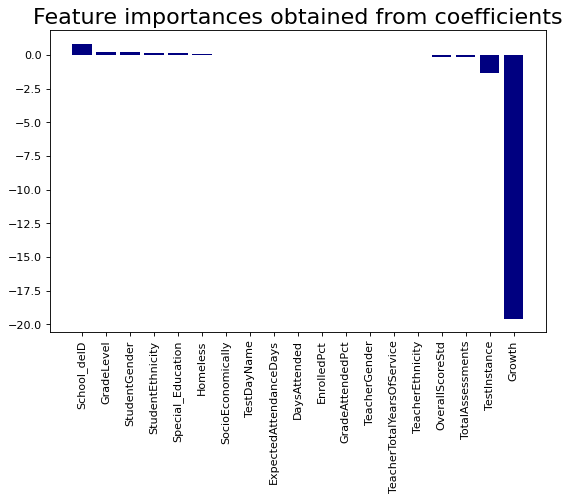

In [15]:
from matplotlib.pyplot import figure
figure(figsize=(8,5), dpi=80)

plt.bar(x=lg_importances['Attribute'], height=importances['Importance'], color='navy')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [16]:
#subset new dataset with only top 5 important features

feat_lg_train = X_train[['School_deID','GradeLevel','StudentGender','StudentEthnicity','Special_Education']]
feat_lg_test = X_test[['School_deID','GradeLevel','StudentGender','StudentEthnicity','Special_Education']]

In [17]:
feat_lg  = LogisticRegression(random_state=0,  solver='newton-cg', 
                          multi_class='multinomial').fit(feat_lg_train, y_train)

feat_lg_pred = feat_lg.predict(feat_lg_test)
print(accuracy_score(y_test, feat_lg_pred))

print(classification_report(y_test, feat_lg_pred, target_names=target_names))


0.3260405549626467
              precision    recall  f1-score   support

      Level1       0.55      0.29      0.38       470
      Level2       0.27      0.02      0.03       484
      Level3       0.30      0.38      0.34       479
      Level4       0.28      0.64      0.39       441

    accuracy                           0.33      1874
   macro avg       0.35      0.33      0.29      1874
weighted avg       0.35      0.33      0.28      1874



####The accuracy lower down drastically with only using the top 5 important features.  Thus, Logistic Regression models need all features to perform well. 

###**RANDOM FOREST**

In [18]:
#import warnings
#warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestClassifier

train_errors = list()
test_errors = list()

for i in range(1,50):
  rf_model = RandomForestClassifier(max_depth=i)    #Create multiple models here each based on the i variable above
  rf_model.fit(X_train,y_train)
  train_pred = rf_model.predict(X_train)
  test_pred = rf_model.predict(X_test)
  train_errors.append(accuracy_score(y_train,train_pred))    # Store the result of modes in t_train_erors and t_test_errors variables
  test_errors.append(accuracy_score(y_test, test_pred))

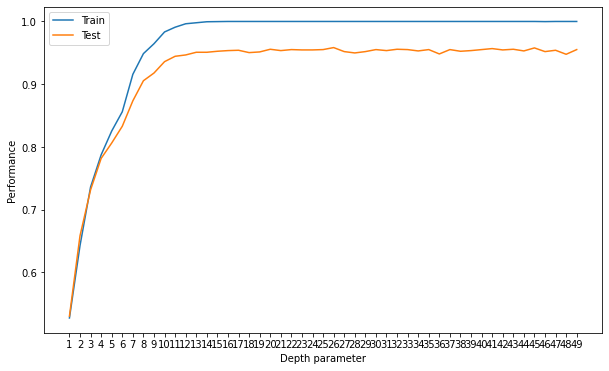

In [19]:
# Plot of test and training errors
fig,ax = plt.subplots(figsize=(10,6))
plt.plot(range(1,50),train_errors, label='Train')
plt.plot(range(1,50),test_errors, label='Test')
plt.legend(loc='upper left')
plt.xlabel('Depth parameter')
plt.ylabel('Performance')
plt.xticks(ticks =np.arange(1, 50, 1));

In [20]:
tuned_rf= RandomForestClassifier(max_depth=13, class_weight = 'balanced')
tuned_rf.fit(X_train,y_train)

tuned_rf_pred= tuned_rf.predict(X_test)

print(accuracy_score(y_test, tuned_rf_pred))

print(classification_report(y_test, tuned_rf_pred, target_names=target_names))

0.9477054429028815
              precision    recall  f1-score   support

      Level1       0.97      0.97      0.97       470
      Level2       0.94      0.95      0.95       484
      Level3       0.95      0.90      0.92       479
      Level4       0.93      0.97      0.95       441

    accuracy                           0.95      1874
   macro avg       0.95      0.95      0.95      1874
weighted avg       0.95      0.95      0.95      1874



###**FEATURE IMPORTANCE OF RANDOM FOREST MODEL**
Let's see if only using the top 7 feature importances can improve the accuracy of the model.**

In [21]:
importances = tuned_rf.feature_importances_

# Sort the feature importance in descending order
sorted_indices = np.argsort(importances)[::-1]
feat_labels = df.columns[1:]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,feat_labels[sorted_indices[f]],importances[sorted_indices[f]]))

 1) OverallScoreStd                0.533105
 2) GradeAttendedPct               0.083631
 3) Growth                         0.057946
 4) StudentGender                  0.050242
 5) DaysAttended                   0.041246
 6) TeacherTotalYearsOfService     0.037434
 7) TotalAssessments               0.033281
 8) GradeLevel                     0.029891
 9) TestInstance                   0.024717
10) OverallLevel                   0.020092
11) Homeless                       0.016305
12) TeacherEthnicity               0.013699
13) EnrolledPct                    0.013628
14) ExpectedAttendanceDays         0.013071
15) StudentEthnicity               0.008776
16) Special_Education              0.007596
17) TestDayName                    0.006143
18) SocioEconomically              0.005027
19) TeacherGender                  0.004170


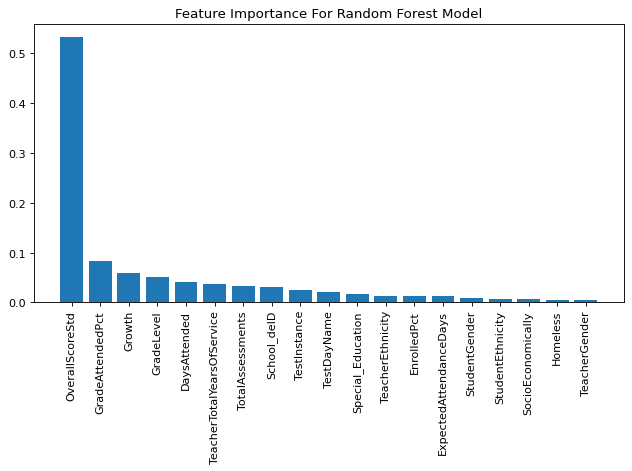

In [22]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
plt.title('Feature Importance For Random Forest Model')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [23]:
#subset new dataset with only top 5 important features

feat_rf_train = X_train[['OverallScoreStd','GradeAttendedPct','Growth','GradeLevel','TeacherTotalYearsOfService']]
feat_rf_test = X_test[['OverallScoreStd','GradeAttendedPct','Growth','GradeLevel','TeacherTotalYearsOfService']]

In [24]:
train_errors = list()
test_errors = list()

for i in range(1,50):
  rf_model = RandomForestClassifier(max_depth=i)    #Create multiple models here each based on the i variable above
  rf_model.fit(feat_rf_train,y_train)
  train_pred = rf_model.predict(feat_rf_train)
  test_pred = rf_model.predict(feat_rf_test)
  train_errors.append(accuracy_score(y_train,train_pred))    # Store the result of modes in t_train_erors and t_test_errors variables
  test_errors.append(accuracy_score(y_test, test_pred))

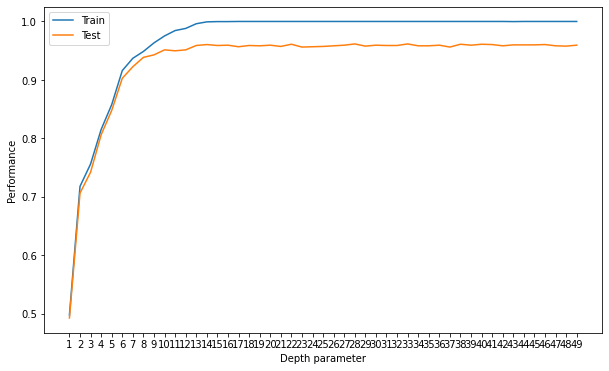

In [25]:
# Plot of test and training errors
fig,ax = plt.subplots(figsize=(10,6))
plt.plot(range(1,50),train_errors, label='Train')
plt.plot(range(1,50),test_errors, label='Test')
plt.legend(loc='upper left')
plt.xlabel('Depth parameter')
plt.ylabel('Performance')
plt.xticks(ticks =np.arange(1, 50, 1));

In [26]:
feat_rf= RandomForestClassifier(max_depth=20, class_weight = 'balanced')
feat_rf.fit(feat_rf_train,y_train)
feat_rf_pred= feat_rf.predict(feat_rf_test)

print(accuracy_score(y_test, feat_rf_pred))
print(classification_report(y_test, feat_rf_pred, target_names=target_names))


0.9583778014941302
              precision    recall  f1-score   support

      Level1       0.99      0.99      0.99       470
      Level2       0.97      0.97      0.97       484
      Level3       0.95      0.91      0.93       479
      Level4       0.93      0.96      0.95       441

    accuracy                           0.96      1874
   macro avg       0.96      0.96      0.96      1874
weighted avg       0.96      0.96      0.96      1874



####**For Random Forest model, the accuracy with important top 5 features is slightly higher than using all features.**

In [27]:
y_train.value_counts()

OverallLevel
4               1120
1               1091
3               1082
2               1077
dtype: int64